In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
import matplotlib.cm as cm
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.datasets import make_regression,make_circles,make_s_curve
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn import decomposition
from factor_analyzer import FactorAnalyzer

In [2]:
X,t=make_s_curve(n_samples=8000, noise=0, random_state=123)
color=np.array(t)
X=pd.DataFrame(X) 
R=X.corr()  #样本相关性矩阵
eig_value, eigvector = np.linalg.eig(R)#求矩阵R的全部特征值，特征向量。
sortkey,eig=list(eig_value.argsort()),list(eig_value)  #按升序排序
eig.sort()
eig.reverse()
sortkey.reverse()

A = np.zeros((eigvector.shape[1],eigvector.shape[1]))
for i,e in enumerate(eig):
    A[i,:]=np.sqrt(e)*eigvector[:,sortkey[i]]
factorM=A.T
print("因子载荷矩阵：\n{0}".format(factorM)) 

因子载荷矩阵：
[[-0.73408195 -0.16654497 -0.65832094]
 [-0.1772608   0.98206173 -0.06429132]
 [ 0.74247119  0.06979852 -0.66623171]]


代码说明：
（1）第1，2行：生成字母S的模拟数据。
（2）第3，4行：将数据变量X_1,X_2,X_3组成成Pandas的数据框，利用数据框的corr()方法计算数据变量的相关系数矩阵R_(3×3)。
（3）第5行：计算相关系数矩阵R的3个特征值和对应的单位特征向量。
（4）第6行：为便于后续处理，获得各特征值升序排序后的索引号。
（5）第7至9行：特征值升序排序后反转位置，即降序排序。得到降序索引号。
（6）第11行：准备因子载荷矩阵，初始时应为3行3列的矩阵。
（7）第12，14行：依据（式10.25）构造因子载荷矩阵。
（8）第15行：输出因子载荷矩阵。由因子载荷矩阵可知，因子f_1与X_1,X_3中较高相关性，因子f_2与X_2高相关，因子f_3也与X_1,X_3有一定的相关性。

In [3]:
lambd=np.zeros((factorM.shape[1],))
for i in range(0,factorM.shape[1]):
    lambd[i]=sum(factorM[:,i]**2)
print("因子方差贡献：{0}".format(lambd))
print("因子方差贡献率：{0}".format(lambd/sum(lambd)))

因子方差贡献：[1.12156117 0.99705429 0.88138454]
因子方差贡献率：[0.37385372 0.33235143 0.29379485]


代码说明：
（1）第1行：定义保存各特征值的结果对象。
（2）第2，3行：基于因子载荷矩阵计算各特征值（因子方差）。
（3）第4，5行：输出各因子的方差（也即特征值）和方差贡献率。从方差贡献率看，第1个因子最重要，第2，3次之，但各因子重要性的差异不大。

In [4]:
score=np.linalg.inv(R)*factorM
print("因子值系数：\n{0}".format(score))

因子值系数：
[[-0.74449116  0.00109871 -0.07873893]
 [ 0.00116941  0.98250601 -0.00125123]
 [ 0.08880377  0.00135841 -0.67590206]]


计算因子值系数

因子载荷矩阵:
 [[ 0.73408195 -0.16654497]
 [ 0.1772608   0.98206173]
 [-0.74247119  0.06979852]]

变量共同度:
 [0.56661353 0.99586663 0.55613531]
因子的方差贡献:[1.12156117 0.99705429]
因子的方差贡献率:[0.37385372 0.33235143]
因子的累计方差贡献率:[0.37385372 0.70620515]


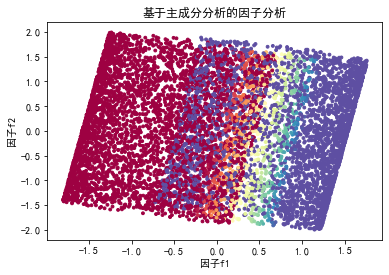

In [5]:
fa = FactorAnalyzer(method='principal',n_factors=2,rotation=None)
fa.fit(X)
print("因子载荷矩阵:\n", fa.loadings_)
print("\n变量共同度:\n", fa.get_communalities())
tmp=fa.get_factor_variance()
print("因子的方差贡献:{0}".format(tmp[0]))
print("因子的方差贡献率:{0}".format(tmp[1]))
print("因子的累计方差贡献率:{0}".format(tmp[2]))
y=fa.transform(X)
plt.scatter(y.T[0],y.T[1],s=8,color=plt.cm.Spectral(color))
plt.title("基于主成分分析的因子分析")
plt.xlabel("因子f1")
plt.ylabel("因子f2")
plt.show()

In [6]:
R

,0,1,2
0,1.000000,0.008891,-0.118065
1,0.008891,1.000000,-0.020232
2,-0.118065,-0.020232,1.000000



变量共同度:
 [0.56661353 0.99586663 0.55613531]
旋转后的因子载荷矩阵:
 [[ 0.75119892 -0.04810104]
 [ 0.019381    0.99774295]
 [-0.74414953 -0.04875225]]
因子的方差贡献:[1.11843397 1.00018149]
因子的方差贡献率:[0.37281132 0.33339383]
因子的累计方差贡献率:[0.37281132 0.70620515]


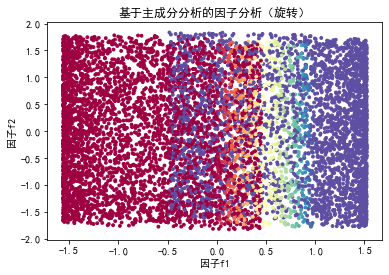

In [7]:
fa = FactorAnalyzer(method='principal',n_factors=2,rotation='varimax')
fa.fit(X)
print("\n变量共同度:\n", fa.get_communalities())
print("旋转后的因子载荷矩阵:\n", fa.loadings_)
tmp=fa.get_factor_variance()
print("因子的方差贡献:{0}".format(tmp[0]))
print("因子的方差贡献率:{0}".format(tmp[1]))
print("因子的累计方差贡献率:{0}".format(tmp[2]))
y=fa.transform(X)
plt.scatter(y.T[0],y.T[1],s=8,color=plt.cm.Spectral(color))
plt.title("基于主成分分析的因子分析（旋转）")
plt.xlabel("因子f1")
plt.ylabel("因子f2")
plt.show()

Text(0, 0.5, '因子f2')

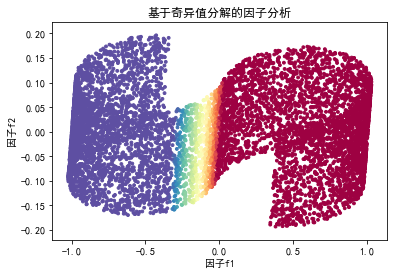

In [8]:
Fac=decomposition.FactorAnalysis(n_components=2)
Fac.fit(X)
y=Fac.transform(X)
plt.scatter(y[:,0],y[:,1],s=8,color=plt.cm.Spectral(color))
plt.title("基于奇异值分解的因子分析")
plt.xlabel("因子f1")
plt.ylabel("因子f2")